In [2]:
# Load pickled data
import matplotlib.pyplot as plt
import pickle, cv2, csv, os, time
import numpy as np
from numpy import newaxis
from random import randint
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import gridspec
%matplotlib inline

import copy
from keras.models import Sequential  #, Graph
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from PIL import Image

Using TensorFlow backend.


In [19]:
len(resizeimg)

3600

In [20]:
import os
from skimage.transform import rescale, resize, downscale_local_mean


current_path = os.getcwd()
print (current_path)
train_path1 = current_path + "/train/Type_1/"
train_path2 = current_path + "/train/Type_2/"
train_path3 = current_path + "/train/Type_3/"
add_type1 = current_path + "/additional_Type_1_v2/Type_1/" 
add_type2 = current_path + "/additional_Type_2_v2/Type_2/" 
add_type3 = current_path + "/additional_Type_3_v2/Type_3/" 

test = current_path+"/test/"

path_list =[]
path_list.append(add_type1)
path_list.append(add_type2)
path_list.append(add_type3)
path_list.append(train_path1)
path_list.append(train_path2)
path_list.append(train_path3)

path_list.append(test)

 
def resize_images(path,pickle_filename):
    resize_img=[]
    size_dict= {}
    #for path in path_list:
    start_time = time.time()
    for root, dirs, files in os.walk(path, topdown=False):
        print ("path:",path,' numFiles:',len(files))
        for f in files:
            if f !='.DS_Store':
                print ("path:",path," path+f:",path+f)
                img = cv2.imread(path+f)
                print ("img shape:",img.shape)
                image_resize = resize(img, (224, 224), mode='reflect')
                print("img_resize shape:",image_resize.shape)
                resize_img.append(image_resize)
                print("size list:",len(resize_img))                
                size_dict[img.shape[0]]=img.shape[1]
        print("dict of image dimensions:",size_dict)
        with open(pickle_filename,'wb') as save_file:
            pickle.dump(resize_img,save_file)
    end_time = time.time()
    print("elapsed time:",(end_time-start_time)/60.)

#uncomment each one to run. Should run wo memory error. 
#resize_images(train_path1,'type1_resize.p')
#resize_images(train_path2,'type2resize.p')
#resize_images(train_path3,'type3resize.p')
#resize_images(add_type1,'type1addresize.p')
#resize_images(add_type2,'type2addresize.p')
#resize_images(add_type3,'type3add_resize.p')
#resize_images(test,'test.p')

            

/Users/dc/DeepLearning/kaggle


In [39]:
read_file = open('type1_resize.p', 'rb') 
imgs_type1 = pickle.load( read_file)
print("num type1 images(250):", len(imgs_type1)) #should be 250

read_file = open('type1add_resize.p', 'rb') 
imgs_type1add = pickle.load( read_file)
print('num type1 additional images(1190):',len(imgs_type1add))

#add to list, np.array(list)
imgs_type1.extend(imgs_type1add)

print(len(imgs_type1))
labels_1 = [0]*(len(imgs_type1))
print (labels_1[0])
print ('num labels_1:',len(labels_1))

num type1 images(250): 250
num type1 additional images(1190): 1190
1440
0
num labels_1: 1440


In [16]:
path = '/Users/dc/DeepLearning/kaggle/additional_Type_2_v2/Type_2/'
path_first='/Users/dc/DeepLearning/kaggle/first1k/'
path_second='/Users/dc/DeepLearning/kaggle/2ndk/'
path_third='/Users/dc/DeepLearning/kaggle/3rdk/'
num=0
for root, dirs, files in os.walk(path):
    for file in files:
        print('moving:',file)
        if (file != '.DS_Store'):
            if (num < 1000):
                os.rename(path+file,path_first+file)
            elif ((num>1000) and (num<2000)):
                os.rename(path+file,path_second+file)
            else:
                os.rename(path+file,path_third+file)
            num+=1
    print('num:',num)

moving: .DS_Store
moving: 0.jpg
moving: 1.jpg
moving: 1002.jpg
moving: 1006.jpg
moving: 1007.jpg
moving: 1008.jpg
moving: 101.jpg
moving: 1013.jpg
moving: 1016.jpg
moving: 1017.jpg
moving: 1020.jpg
moving: 1022.jpg
moving: 1023.jpg
moving: 1024.jpg
moving: 1025.jpg
moving: 1026.jpg
moving: 1029.jpg
moving: 103.jpg
moving: 1030.jpg
moving: 1031.jpg
moving: 1033.jpg
moving: 1034.jpg
moving: 1035.jpg
moving: 1037.jpg
moving: 1038.jpg
moving: 1039.jpg
moving: 1040.jpg
moving: 1043.jpg
moving: 1044.jpg
moving: 1045.jpg
moving: 1046.jpg
moving: 1049.jpg
moving: 105.jpg
moving: 1050.jpg
moving: 1053.jpg
moving: 1055.jpg
moving: 1056.jpg
moving: 1057.jpg
moving: 1059.jpg
moving: 1062.jpg
moving: 1065.jpg
moving: 1068.jpg
moving: 107.jpg
moving: 1071.jpg
moving: 1073.jpg
moving: 1077.jpg
moving: 1079.jpg
moving: 108.jpg
moving: 1080.jpg
moving: 1083.jpg
moving: 1084.jpg
moving: 1085.jpg
moving: 1086.jpg
moving: 1095.jpg
moving: 1096.jpg
moving: 1097.jpg
moving: 1098.jpg
moving: 1099.jpg
moving:

moving: 2123.jpg
moving: 2124.jpg
moving: 2125.jpg
moving: 2126.jpg
moving: 2127.jpg
moving: 213.jpg
moving: 2130.jpg
moving: 2131.jpg
moving: 2132.jpg
moving: 2133.jpg
moving: 2136.jpg
moving: 2138.jpg
moving: 2140.jpg
moving: 2142.jpg
moving: 2145.jpg
moving: 2146.jpg
moving: 2147.jpg
moving: 2148.jpg
moving: 215.jpg
moving: 2154.jpg
moving: 2155.jpg
moving: 2156.jpg
moving: 2158.jpg
moving: 2159.jpg
moving: 2162.jpg
moving: 2165.jpg
moving: 2167.jpg
moving: 2168.jpg
moving: 217.jpg
moving: 2170.jpg
moving: 2171.jpg
moving: 2172.jpg
moving: 2173.jpg
moving: 2174.jpg
moving: 218.jpg
moving: 2181.jpg
moving: 2182.jpg
moving: 2183.jpg
moving: 2188.jpg
moving: 219.jpg
moving: 2192.jpg
moving: 2197.jpg
moving: 22.jpg
moving: 220.jpg
moving: 2200.jpg
moving: 2201.jpg
moving: 2204.jpg
moving: 2205.jpg
moving: 2206.jpg
moving: 2208.jpg
moving: 2212.jpg
moving: 2214.jpg
moving: 2215.jpg
moving: 2216.jpg
moving: 2217.jpg
moving: 2219.jpg
moving: 2220.jpg
moving: 2221.jpg
moving: 2224.jpg
movin

moving: 2952.jpg
moving: 2953.jpg
moving: 2955.jpg
moving: 2956.jpg
moving: 2957.jpg
moving: 2958.jpg
moving: 2959.jpg
moving: 2961.jpg
moving: 2963.jpg
moving: 2966.jpg
moving: 2969.jpg
moving: 297.jpg
moving: 2970.jpg
moving: 2971.jpg
moving: 2972.jpg
moving: 2974.jpg
moving: 2975.jpg
moving: 2976.jpg
moving: 2977.jpg
moving: 298.jpg
moving: 2980.jpg
moving: 2983.jpg
moving: 2984.jpg
moving: 2986.jpg
moving: 2987.jpg
moving: 299.jpg
moving: 2990.jpg
moving: 2991.jpg
moving: 2994.jpg
moving: 2996.jpg
moving: 2997.jpg
moving: 30.jpg
moving: 300.jpg
moving: 3002.jpg
moving: 3003.jpg
moving: 3007.jpg
moving: 3011.jpg
moving: 3012.jpg
moving: 3013.jpg
moving: 3014.jpg
moving: 3015.jpg
moving: 3019.jpg
moving: 3020.jpg
moving: 3022.jpg
moving: 3024.jpg
moving: 3026.jpg
moving: 3027.jpg
moving: 3029.jpg
moving: 3030.jpg
moving: 3031.jpg
moving: 3036.jpg
moving: 3037.jpg
moving: 3038.jpg
moving: 3039.jpg
moving: 3046.jpg
moving: 3047.jpg
moving: 305.jpg
moving: 3050.jpg
moving: 3051.jpg
movi

moving: 4595.jpg
moving: 4596.jpg
moving: 4597.jpg
moving: 4598.jpg
moving: 4599.jpg
moving: 46.jpg
moving: 4600.jpg
moving: 4601.jpg
moving: 4617.jpg
moving: 4618.jpg
moving: 4619.jpg
moving: 4620.jpg
moving: 4621.jpg
moving: 4622.jpg
moving: 4623.jpg
moving: 4624.jpg
moving: 4625.jpg
moving: 4626.jpg
moving: 4627.jpg
moving: 4631.jpg
moving: 4632.jpg
moving: 4633.jpg
moving: 4634.jpg
moving: 4637.jpg
moving: 4638.jpg
moving: 4639.jpg
moving: 4640.jpg
moving: 4641.jpg
moving: 4642.jpg
moving: 4643.jpg
moving: 4644.jpg
moving: 4645.jpg
moving: 4646.jpg
moving: 465.jpg
moving: 4650.jpg
moving: 4651.jpg
moving: 4652.jpg
moving: 4653.jpg
moving: 4654.jpg
moving: 4655.jpg
moving: 4656.jpg
moving: 4657.jpg
moving: 4658.jpg
moving: 466.jpg
moving: 4663.jpg
moving: 4664.jpg
moving: 4665.jpg
moving: 4668.jpg
moving: 4669.jpg
moving: 467.jpg
moving: 4670.jpg
moving: 4672.jpg
moving: 4673.jpg
moving: 4674.jpg
moving: 4675.jpg
moving: 4680.jpg
moving: 4681.jpg
moving: 4682.jpg
moving: 469.jpg
mov

moving: 6596.jpg
moving: 6597.jpg
moving: 6598.jpg
moving: 6599.jpg
moving: 66.jpg
moving: 6600.jpg
moving: 6601.jpg
moving: 6602.jpg
moving: 6603.jpg
moving: 6607.jpg
moving: 6608.jpg
moving: 6609.jpg
moving: 661.jpg
moving: 6610.jpg
moving: 6611.jpg
moving: 6615.jpg
moving: 6616.jpg
moving: 6617.jpg
moving: 662.jpg
moving: 6627.jpg
moving: 6628.jpg
moving: 6629.jpg
moving: 663.jpg
moving: 6632.jpg
moving: 6635.jpg
moving: 6636.jpg
moving: 6644.jpg
moving: 6645.jpg
moving: 6646.jpg
moving: 6659.jpg
moving: 666.jpg
moving: 6660.jpg
moving: 6661.jpg
moving: 6662.jpg
moving: 6663.jpg
moving: 6664.jpg
moving: 6665.jpg
moving: 6666.jpg
moving: 6667.jpg
moving: 6668.jpg
moving: 6669.jpg
moving: 667.jpg
moving: 6670.jpg
moving: 6671.jpg
moving: 6672.jpg
moving: 6673.jpg
moving: 6674.jpg
moving: 6675.jpg
moving: 6676.jpg
moving: 668.jpg
moving: 669.jpg
moving: 6690.jpg
moving: 6691.jpg
moving: 6694.jpg
moving: 6695.jpg
moving: 6696.jpg
moving: 6697.jpg
moving: 6698.jpg
moving: 6704.jpg
moving

In [21]:
path_first='/Users/dc/DeepLearning/kaggle/first1k/'
path_second='/Users/dc/DeepLearning/kaggle/2ndk/'
path_third='/Users/dc/DeepLearning/kaggle/3rdk/'

resize_images(path_first,'type2_first.p')
resize_images(path_second,'type2_second.p')
resize_images(path_third,'type2_third.p')


path: /Users/dc/DeepLearning/kaggle/first1k/  numFiles: 1000
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/0.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 2
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1002.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 3
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1006.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 4
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1007.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 5
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kag

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 48
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1080.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 49
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1083.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 50
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1084.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 51
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1085.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 52
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1086.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 53
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Us

img_resize shape: (224, 224, 3)
size list: 95
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1167.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 96
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1168.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 97
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/117.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 98
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1170.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 99
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1171.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 100
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/

img_resize shape: (224, 224, 3)
size list: 142
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1240.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 143
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1241.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 144
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1244.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 145
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1246.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 146
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1247.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 147
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/k

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 189
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1318.jpg
img shape: (640, 480, 3)
img_resize shape: (224, 224, 3)
size list: 190
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1320.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 191
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1321.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 192
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1322.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 193
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1323.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 194
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f:

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 236
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1390.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 237
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1391.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 238
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1393.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 239
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1395.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 240
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1397.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 241
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 283
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1470.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 284
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1471.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 285
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1473.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 286
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1475.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 287
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1478.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 288
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 330
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1559.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 331
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1560.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 332
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1561.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 333
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1564.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 334
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1567.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 335
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 377
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1634.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 378
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1636.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 379
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1639.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 380
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1640.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 381
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1641.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 382
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 424
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1710.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 425
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1712.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 426
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1714.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 427
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1715.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 428
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1719.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 429
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 471
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/179.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 472
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1792.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 473
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1795.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 474
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/180.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 475
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1806.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 476
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f:

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 518
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1873.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 519
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1874.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 520
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1878.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 521
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1879.jpg
img shape: (640, 480, 3)
img_resize shape: (224, 224, 3)
size list: 522
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/188.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 523
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: 

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 565
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1937.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 566
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1938.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 567
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1940.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 568
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1943.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 569
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/1945.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 570
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 612
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2016.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 613
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2018.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 614
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2019.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 615
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2020.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 616
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2021.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 617
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 659
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2082.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 660
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2086.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 661
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2088.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 662
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2089.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 663
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/209.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 664
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 706
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2159.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 707
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2162.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 708
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2165.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 709
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2167.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 710
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2168.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 711
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 753
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2252.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 754
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2253.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 755
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2254.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 756
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2258.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 757
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/226.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 758
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f

img_resize shape: (224, 224, 3)
size list: 800
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2329.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 801
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/233.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 802
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2330.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 803
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2332.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 804
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2333.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 805
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/ka

img_resize shape: (224, 224, 3)
size list: 847
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2405.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 848
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2406.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 849
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2407.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 850
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2409.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 851
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/241.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 852
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/ka

img_resize shape: (224, 224, 3)
size list: 894
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2486.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 895
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2487.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 896
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2488.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 897
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/249.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 898
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2493.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 899
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/ka

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 941
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2555.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 942
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2556.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 943
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2557.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 944
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2558.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 945
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2560.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 946
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 988
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2631.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 989
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2634.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 990
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2635.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 991
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2636.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 992
path: /Users/dc/DeepLearning/kaggle/first1k/  path+f: /Users/dc/DeepLearning/kaggle/first1k/2638.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 993
path: /Users/dc/DeepLearning/kaggle/first1k/  path+

img_resize shape: (224, 224, 3)
size list: 36
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2706.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 37
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2707.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 38
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2708.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 39
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2709.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 40
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2710.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 41
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2712.jpg
img shape: (4128, 3

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 85
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2788.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 86
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/279.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 87
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2792.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 88
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2793.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 89
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2795.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 90
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/27

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 134
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2867.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 135
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2868.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 136
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2870.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 137
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2872.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 138
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2873.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 139
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 183
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/294.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 184
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2940.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 185
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2942.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 186
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2944.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 187
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/2945.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 188
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 232
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3015.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 233
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3019.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 234
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3020.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 235
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3022.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 236
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3024.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 237
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 281
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3102.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 282
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3103.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 283
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3104.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 284
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3106.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 285
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3108.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 286
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 330
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3181.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 331
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3182.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 332
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3183.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 333
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3184.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 334
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3185.jpg
img shape: (3096, 4128, 3)
img_resize shape: (224, 224, 3)
size list: 335
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 379
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3256.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 380
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3257.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 381
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3259.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 382
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/326.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 383
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3260.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 384
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 428
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3330.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 429
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3332.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 430
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3334.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 431
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3336.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 432
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3337.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 433
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 477
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3406.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 478
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3409.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 479
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/341.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 480
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3411.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 481
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3413.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 482
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2

img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 526
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3487.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 527
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/349.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 528
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3490.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 529
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3492.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 530
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3494.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 531
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 575
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3554.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 576
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3555.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 577
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3558.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 578
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/356.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 579
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3560.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 580
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 624
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/363.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 625
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3631.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 626
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3635.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 627
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3636.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 628
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/364.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 629
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2n

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 673
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3711.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 674
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3713.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 675
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3714.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 676
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3717.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 677
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3718.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 678
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/

img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 722
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3799.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 723
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/380.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 724
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3803.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 725
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3805.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 726
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3808.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 727
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 771
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3883.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 772
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3885.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 773
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3887.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 774
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3888.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 775
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3892.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 776
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 820
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3960.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 821
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3962.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 822
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3963.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 823
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3964.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 824
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/3967.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 825
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/

img_resize shape: (224, 224, 3)
size list: 869
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4068.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 870
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4069.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 871
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/407.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 872
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4070.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 873
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4080.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 874
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4081.jpg
img shape: (32

img_resize shape: (224, 224, 3)
size list: 918
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4155.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 919
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4156.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 920
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4157.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 921
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4158.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 922
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4159.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 923
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/416.jpg
img shape: (41

img_resize shape: (224, 224, 3)
size list: 967
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4228.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 968
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4229.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 969
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4230.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 970
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4231.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 971
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4232.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 972
path: /Users/dc/DeepLearning/kaggle/2ndk/  path+f: /Users/dc/DeepLearning/kaggle/2ndk/4233.jpg
img shape: (3

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 16
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4277.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 17
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4278.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 18
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4279.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 19
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/428.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 20
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4280.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 21
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/42

img_resize shape: (224, 224, 3)
size list: 65
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4366.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 66
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4367.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 67
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4368.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 68
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4369.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 69
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4372.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 70
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4373.jpg
img shape: (3264, 2

img_resize shape: (224, 224, 3)
size list: 114
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4441.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 115
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4445.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 116
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4446.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 117
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4447.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 118
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4448.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 119
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4449.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 163
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4523.jpg
img shape: (2448, 3264, 3)
img_resize shape: (224, 224, 3)
size list: 164
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4524.jpg
img shape: (2448, 3264, 3)
img_resize shape: (224, 224, 3)
size list: 165
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4525.jpg
img shape: (2448, 3264, 3)
img_resize shape: (224, 224, 3)
size list: 166
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4526.jpg
img shape: (2448, 3264, 3)
img_resize shape: (224, 224, 3)
size list: 167
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4527.jpg
img shape: (2448, 3264, 3)
img_resize shape: (224, 224, 3)
size list: 168
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4528.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 212
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4601.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 213
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4617.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 214
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4618.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 215
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4619.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 216
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4620.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 217
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4621.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 261
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4681.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 262
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4682.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 263
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/469.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 264
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/47.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 265
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/470.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 266
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/471.jpg
img shape: (4128, 

img_resize shape: (224, 224, 3)
size list: 310
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4836.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 311
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4837.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 312
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4838.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 313
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4839.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 314
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4840.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 315
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4841.jpg
img shape: (3

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 359
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4923.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 360
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4925.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 361
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4930.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 362
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4931.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 363
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/4932.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 364
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/

img_resize shape: (224, 224, 3)
size list: 408
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5032.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 409
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5036.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 410
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5037.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 411
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5038.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 412
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5047.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 413
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5048.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 457
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5136.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 458
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5137.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 459
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5138.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 460
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5139.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 461
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/514.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 462
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5140.jpg
img shape: (32

img_resize shape: (224, 224, 3)
size list: 506
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5217.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 507
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5218.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 508
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5219.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 509
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5220.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 510
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5221.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 511
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5222.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 555
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5336.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 556
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5345.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 557
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5346.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 558
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5347.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 559
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5348.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 560
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5349.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 604
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5462.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 605
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5463.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 606
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5464.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 607
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5465.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 608
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5466.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 609
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5467.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 653
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5543.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 654
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5544.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 655
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5545.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 656
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5546.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 657
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5547.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 658
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5548.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 702
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/565.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 703
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5654.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 704
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5655.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 705
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5656.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 706
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5657.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 707
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/566.jpg
img shape: (412

img_resize shape: (224, 224, 3)
size list: 751
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5761.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 752
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5762.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 753
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5764.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 754
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/577.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 755
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/578.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 756
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/579.jpg
img shape: (4128

img_resize shape: (224, 224, 3)
size list: 800
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5864.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 801
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5865.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 802
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5866.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 803
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/587.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 804
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/588.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 805
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/5885.jpg
img shape: (326

img_resize shape: (224, 224, 3)
size list: 849
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6040.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 850
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6041.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 851
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6048.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 852
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6064.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 853
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6065.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 854
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6066.jpg
img shape: (3

img_resize shape: (224, 224, 3)
size list: 898
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/617.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 899
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6170.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 900
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6171.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 901
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6172.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 902
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6173.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 903
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6174.jpg
img shape: (32

img_resize shape: (224, 224, 3)
size list: 947
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6250.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 948
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6251.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 949
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6252.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 950
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6253.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 951
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/626.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 952
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/627.jpg
img shape: (412

img_resize shape: (224, 224, 3)
size list: 996
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6327.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 997
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6328.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 998
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6329.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 999
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/633.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1000
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6330.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1001
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6331.jpg
img shape: (

img_resize shape: (224, 224, 3)
size list: 1045
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6406.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1046
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6407.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1047
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6408.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1048
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6409.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1049
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/641.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 1050
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6410.jpg
img shap

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1094
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6484.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1095
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6485.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1096
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6486.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1097
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6487.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1098
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6488.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1099
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/k

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1143
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6554.jpg
img shape: (2448, 3264, 3)
img_resize shape: (224, 224, 3)
size list: 1144
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6555.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1145
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6556.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1146
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/656.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1147
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6560.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1148
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/ka

img_resize shape: (224, 224, 3)
size list: 1192
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6615.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1193
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6616.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1194
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6617.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1195
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/662.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1196
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6627.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1197
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6628.jpg
img shap

img_resize shape: (224, 224, 3)
size list: 1241
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6711.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1242
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6712.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1243
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6713.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1244
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6714.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1245
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6715.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1246
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6716.jpg
img sha

img_resize shape: (224, 224, 3)
size list: 1290
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6792.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1291
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6793.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1292
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6794.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1293
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6795.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1294
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6797.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1295
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/680.jpg
img shap

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1339
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6855.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1340
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6856.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1341
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/686.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1342
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6868.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1343
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/6869.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1344
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/ka

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1388
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/707.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1389
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/711.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1390
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/714.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 1391
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/716.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1392
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/717.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1393
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle

img_resize shape: (224, 224, 3)
size list: 1437
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/796.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1438
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/797.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1439
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/798.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1440
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/799.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1441
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/80.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1442
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/800.jpg
img shape: (41

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1486
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/869.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1487
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/870.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1488
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/873.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1489
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/878.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1490
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/879.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1491
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1535
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/941.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1536
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/944.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1537
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/946.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1538
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/947.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 1539
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle/3rdk/948.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1540
path: /Users/dc/DeepLearning/kaggle/3rdk/  path+f: /Users/dc/DeepLearning/kaggle

In [10]:
#redo type 2. Too many files for stupid pickle format

path = '/Users/dc/DeepLearning/kaggle/additional_Type_2_v2'
first1k=[]
second1k=[]
third1k=[]
for file in os.walk(path):
    print (file)
    img = cv2.imread(path+file)
    image_resize = resize(img, (224, 224), mode='reflect')
    if (num < 1000) and (file!='.DS_Store'):
        first1k.append(image_resize)
    else if ((num>1000) and (num<2000)):
        second1k.append(image_resize)
    else:
        thirdk.append(image_resize)
    num+=1


('/Users/dc/DeepLearning/kaggle/additional_Type_2_v2', ['Type_2'], ['.DS_Store'])
('/Users/dc/DeepLearning/kaggle/additional_Type_2_v2/Type_2', [], ['.DS_Store', '0.jpg', '1.jpg', '1002.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '101.jpg', '1013.jpg', '1016.jpg', '1017.jpg', '1020.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '1040.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1053.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1059.jpg', '1062.jpg', '1065.jpg', '1068.jpg', '107.jpg', '1071.jpg', '1073.jpg', '1077.jpg', '1079.jpg', '108.jpg', '1080.jpg', '1083.jpg', '1084.jpg', '1085.jpg', '1086.jpg', '1095.jpg', '1096.jpg', '1097.jpg', '1098.jpg', '1099.jpg', '11.jpg', '1101.jpg', '1103.jpg', '1105.jpg', '1106.jpg', '1107.jpg', '1108.jpg', '1109.jpg', '1112.jpg', '1115.jpg', '1116.jpg', '1118.jpg', '1119.jpg',

In [36]:
#redo type2

img2 = []

read_file = open('type2_second.p', 'rb') 
imgs_type2 = pickle.load( read_file)
img2 += imgs_type2
print("num type2_second:", len(imgs_type2)) #should be 1000-1 for DS_Store


read_file = open('type2_first.p', 'rb') 
imgs_type2 = pickle.load( read_file)
img2 += imgs_type2
print("num type2_first:", len(imgs_type2)) #should be 1000

read_file = open('type2_second.p', 'rb') 
imgs_type2 = pickle.load( read_file)
img2 += imgs_type2
print("num type2_second:", len(imgs_type2)) #should be 999

read_file = open('type2_third.p', 'rb') 
imgs_type2 = pickle.load( read_file)
img2 += imgs_type2
print("num type2_third:", len(imgs_type2)) #should be 1566


label_2add=[1]*(999+1000+999+1566)
print ('label_2add:',len(label_2add))
print (label_2add[0])
print ('num img2:',len(img2))

num type2_second: 999
num type2_first: 1000
num type2_second: 999
num type2_third: 1566
label_2add: 4564
1
num img2: 4564


In [24]:
# redo type3 move type3 files
path = '/Users/dc/DeepLearning/kaggle/additional_Type_3_v2/Type_3/'
path_first='/Users/dc/DeepLearning/kaggle/first_third1k/'
path_second='/Users/dc/DeepLearning/kaggle/third2ndk/'
#path_third='/Users/dc/DeepLearning/kaggle/third3rdk/'

num = 0

for root, dirs, files in os.walk(path):
    for file in files:
        print('moving:',file)
        if (file != '.DS_Store'):
            if (num < 1000):
                os.rename(path+file,path_first+file)
            elif ((num>1000) and (num<2000)):
                os.rename(path+file,path_second+file)
            else:
                os.rename(path+file,path_third+file)
            num+=1
    print('num:',num)

moving: 100.jpg
moving: 1010.jpg
moving: 1012.jpg
moving: 1014.jpg
moving: 1019.jpg
moving: 1021.jpg
moving: 1027.jpg
moving: 1041.jpg
moving: 1048.jpg
moving: 1051.jpg
moving: 1052.jpg
moving: 106.jpg
moving: 1063.jpg
moving: 1064.jpg
moving: 1067.jpg
moving: 1070.jpg
moving: 1072.jpg
moving: 1076.jpg
moving: 1078.jpg
moving: 1082.jpg
moving: 1088.jpg
moving: 1089.jpg
moving: 109.jpg
moving: 1092.jpg
moving: 110.jpg
moving: 1100.jpg
moving: 1102.jpg
moving: 1113.jpg
moving: 1114.jpg
moving: 1122.jpg
moving: 1124.jpg
moving: 113.jpg
moving: 1131.jpg
moving: 1132.jpg
moving: 1135.jpg
moving: 114.jpg
moving: 1145.jpg
moving: 1146.jpg
moving: 1147.jpg
moving: 1150.jpg
moving: 1152.jpg
moving: 1156.jpg
moving: 1160.jpg
moving: 1162.jpg
moving: 1164.jpg
moving: 1169.jpg
moving: 1172.jpg
moving: 1180.jpg
moving: 1190.jpg
moving: 1191.jpg
moving: 1199.jpg
moving: 120.jpg
moving: 1201.jpg
moving: 1202.jpg
moving: 1206.jpg
moving: 121.jpg
moving: 1216.jpg
moving: 1218.jpg
moving: 1224.jpg
movin

moving: 4024.jpg
moving: 4025.jpg
moving: 4026.jpg
moving: 403.jpg
moving: 4071.jpg
moving: 4072.jpg
moving: 4073.jpg
moving: 4075.jpg
moving: 4076.jpg
moving: 4077.jpg
moving: 4078.jpg
moving: 4079.jpg
moving: 4084.jpg
moving: 4085.jpg
moving: 4086.jpg
moving: 4087.jpg
moving: 4088.jpg
moving: 4089.jpg
moving: 409.jpg
moving: 4100.jpg
moving: 4101.jpg
moving: 4102.jpg
moving: 4103.jpg
moving: 4104.jpg
moving: 4105.jpg
moving: 4106.jpg
moving: 4107.jpg
moving: 4108.jpg
moving: 411.jpg
moving: 4114.jpg
moving: 4115.jpg
moving: 4116.jpg
moving: 4117.jpg
moving: 4118.jpg
moving: 4119.jpg
moving: 4120.jpg
moving: 4121.jpg
moving: 4124.jpg
moving: 4125.jpg
moving: 4126.jpg
moving: 4139.jpg
moving: 4140.jpg
moving: 4141.jpg
moving: 4142.jpg
moving: 4149.jpg
moving: 415.jpg
moving: 4150.jpg
moving: 4151.jpg
moving: 4152.jpg
moving: 4167.jpg
moving: 4168.jpg
moving: 4169.jpg
moving: 4173.jpg
moving: 4174.jpg
moving: 4175.jpg
moving: 4176.jpg
moving: 4177.jpg
moving: 4178.jpg
moving: 4179.jpg
m

moving: 542.jpg
moving: 5420.jpg
moving: 5421.jpg
moving: 5422.jpg
moving: 5423.jpg
moving: 5424.jpg
moving: 5425.jpg
moving: 5426.jpg
moving: 5427.jpg
moving: 5428.jpg
moving: 5429.jpg
moving: 5432.jpg
moving: 5433.jpg
moving: 5434.jpg
moving: 5435.jpg
moving: 5436.jpg
moving: 5437.jpg
moving: 5438.jpg
moving: 5439.jpg
moving: 5440.jpg
moving: 5441.jpg
moving: 5442.jpg
moving: 5444.jpg
moving: 5445.jpg
moving: 5446.jpg
moving: 5447.jpg
moving: 5448.jpg
moving: 5449.jpg
moving: 5450.jpg
moving: 5453.jpg
moving: 5454.jpg
moving: 5455.jpg
moving: 5456.jpg
moving: 5457.jpg
moving: 5458.jpg
moving: 5459.jpg
moving: 546.jpg
moving: 5460.jpg
moving: 5461.jpg
moving: 5472.jpg
moving: 5473.jpg
moving: 5474.jpg
moving: 5475.jpg
moving: 5476.jpg
moving: 5477.jpg
moving: 5478.jpg
moving: 5479.jpg
moving: 5480.jpg
moving: 5481.jpg
moving: 5482.jpg
moving: 5484.jpg
moving: 5485.jpg
moving: 5486.jpg
moving: 5487.jpg
moving: 5488.jpg
moving: 5489.jpg
moving: 5490.jpg
moving: 5502.jpg
moving: 5503.jpg

In [25]:
path_first='/Users/dc/DeepLearning/kaggle/first_third1k/'
path_second='/Users/dc/DeepLearning/kaggle/third2ndk/'
#path_third='/Users/dc/DeepLearning/kaggle/3rdk/'

resize_images(path_first,'type3_first.p')
resize_images(path_second,'type3_second.p')


path: /Users/dc/DeepLearning/kaggle/first_third1k/  numFiles: 1000
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/100.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 1
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1010.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 2
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1012.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 3
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1014.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 4
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1019.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 5
path: /Us

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 45
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1169.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 46
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1172.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 47
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1180.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 48
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1190.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 49
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1191.jpg
img shape: (640, 480, 3)
img_resize shape: (224, 224, 3)
size list: 50

img_resize shape: (224, 224, 3)
size list: 89
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1394.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 90
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1399.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 91
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1401.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 92
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1403.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 93
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1407.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 94
path: /Users/dc/DeepLear

img_resize shape: (224, 224, 3)
size list: 133
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1583.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 134
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1588.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 135
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/159.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 136
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1590.jpg
img shape: (640, 480, 3)
img_resize shape: (224, 224, 3)
size list: 137
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1595.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 138
path: /Users/dc/DeepL

img_resize shape: (224, 224, 3)
size list: 177
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1757.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 178
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1765.jpg
img shape: (640, 480, 3)
img_resize shape: (224, 224, 3)
size list: 179
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1767.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 180
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1768.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 181
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1771.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 182
path: /Users/dc/Deep

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 221
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1966.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 222
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1968.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 223
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1969.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 224
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/1973.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 225
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/198.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size li

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 265
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2178.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 266
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2179.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 267
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2180.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 268
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2186.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 269
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2191.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size l

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 309
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2331.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 310
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2341.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 311
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2342.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 312
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2349.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 313
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/235.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size li

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 353
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2563.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 354
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2568.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 355
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2578.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 356
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2584.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 357
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2586.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size l

img_resize shape: (224, 224, 3)
size list: 397
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2776.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 398
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2777.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 399
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2779.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 400
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/278.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 401
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/2783.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 402
path: /Users/dc/Dee

img_resize shape: (224, 224, 3)
size list: 441
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3001.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 442
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3004.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 443
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3006.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 444
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3009.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 445
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/301.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 446
path: /Users/dc/Dee

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 485
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3164.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 486
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3166.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 487
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3167.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 488
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3189.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 489
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3192.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size l

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 529
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3333.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 530
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3356.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 531
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3359.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 532
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3361.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 533
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3365.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size l

img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 573
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3517.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 574
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3529.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 575
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3531.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 576
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3543.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 577
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3547.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size l

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 617
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3734.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 618
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3736.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 619
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3737.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 620
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3744.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 621
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3748.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size l

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 661
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3923.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 662
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3925.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 663
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3928.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 664
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/393.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 665
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/3934.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size li

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 705
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4103.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 706
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4104.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 707
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4105.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 708
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4106.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 709
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4107.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size l

img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 749
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4206.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 750
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4207.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 751
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4208.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 752
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4209.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 753
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4215.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size l

img_resize shape: (224, 224, 3)
size list: 793
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4337.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 794
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4341.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 795
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4342.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 796
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4343.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 797
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4344.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 798
path: /Users/dc/De

img_resize shape: (224, 224, 3)
size list: 837
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4453.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 838
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4454.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 839
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4455.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 840
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4456.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 841
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4457.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 842
path: /Users/dc/De

img_resize shape: (224, 224, 3)
size list: 881
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4574.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 882
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4575.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 883
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4576.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 884
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4577.jpg
img shape: (2448, 3264, 3)
img_resize shape: (224, 224, 3)
size list: 885
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4578.jpg
img shape: (2448, 3264, 3)
img_resize shape: (224, 224, 3)
size list: 886
path: /Users/dc/De

img_resize shape: (224, 224, 3)
size list: 925
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4707.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 926
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4708.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 927
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4709.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 928
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4710.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 929
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4734.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 930
path: /Users/dc/De

img_resize shape: (224, 224, 3)
size list: 969
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4782.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 970
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4783.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 971
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4784.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 972
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4788.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 973
path: /Users/dc/DeepLearning/kaggle/first_third1k/  path+f: /Users/dc/DeepLearning/kaggle/first_third1k/4789.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 974
path: /Users/dc/De

img_resize shape: (224, 224, 3)
size list: 13
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4851.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 14
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4852.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 15
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4853.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 16
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4854.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 17
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4855.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 18
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/d

img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 60
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4972.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 61
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4973.jpg
img shape: (4128, 2322, 3)
img_resize shape: (224, 224, 3)
size list: 62
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4975.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 63
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4976.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 64
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/4977.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 65
path: /Users/dc/DeepLearning/kaggle/t

img_resize shape: (224, 224, 3)
size list: 106
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5041.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 107
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5042.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 108
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5043.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 109
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5044.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 110
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5045.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 111
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 152
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5121.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 153
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5122.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 154
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5123.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 155
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5124.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 156
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5144.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 157
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 198
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5236.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 199
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5237.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 200
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5238.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 201
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5239.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 202
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5240.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 203
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 244
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5304.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 245
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5305.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 246
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5306.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 247
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5307.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 248
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5308.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 249
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 290
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5393.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 291
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5394.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 292
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5395.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 293
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5396.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 294
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5397.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 295
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 336
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5448.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 337
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5449.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 338
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5450.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 339
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5453.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 340
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5454.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 341
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 382
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5518.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 383
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5519.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 384
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5520.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 385
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5521.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 386
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5522.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 387
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 428
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5590.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 429
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5591.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 430
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/560.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 431
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5603.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 432
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5604.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 433
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Us

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 474
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5684.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 475
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5685.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 476
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5686.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 477
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5687.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 478
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5688.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 479
path: /Users/dc/DeepLearning/ka

img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 520
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5749.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 521
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5750.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 522
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5751.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 523
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5752.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 524
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5754.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 525
path: /Users/dc/DeepLearning/ka

img_resize shape: (224, 224, 3)
size list: 566
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5873.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 567
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5874.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 568
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5875.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 569
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5876.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 570
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5877.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 571
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 612
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5955.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 613
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5956.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 614
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5957.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 615
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5958.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 616
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/5959.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 617
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 658
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6046.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 659
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6047.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 660
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6053.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 661
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6054.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 662
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6055.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 663
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 704
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6154.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 705
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6158.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 706
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6159.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 707
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6160.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 708
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6161.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 709
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /U

img_resize shape: (224, 224, 3)
size list: 750
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6269.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 751
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/628.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 752
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6280.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 753
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6281.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 754
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6282.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 755
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Us

img_resize shape: (224, 224, 3)
size list: 796
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6533.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 797
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6539.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 798
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/654.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 799
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6541.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 800
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6542.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 801
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Us

img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 842
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/67.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 843
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6700.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 844
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6701.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 845
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6702.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 846
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6703.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 847
path: /Users/dc/DeepLearning/kagg

img_resize shape: (224, 224, 3)
size list: 888
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6907.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 889
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6908.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 890
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6909.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 891
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/691.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 892
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/6910.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 893
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Us

img_resize shape: (224, 224, 3)
size list: 935
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/825.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 936
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/838.jpg
img shape: (4128, 3096, 3)
img_resize shape: (224, 224, 3)
size list: 937
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/844.jpg
img shape: (4160, 3120, 3)
img_resize shape: (224, 224, 3)
size list: 938
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/850.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 939
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/dc/DeepLearning/kaggle/third2ndk/851.jpg
img shape: (3264, 2448, 3)
img_resize shape: (224, 224, 3)
size list: 940
path: /Users/dc/DeepLearning/kaggle/third2ndk/  path+f: /Users/

In [38]:
img3=[]

read_file = open('type3_resize.p', 'rb') 
imgs_type3 = pickle.load( read_file)
img3 += imgs_type3
print("num type3_resize:", len(imgs_type3)) #should be 


read_file = open('type3_first.p', 'rb') 
imgs_type3 = pickle.load( read_file)
img3 += imgs_type3
print("num type3_first:", len(imgs_type3)) #should be 1000

read_file = open('type3_second.p', 'rb') 
imgs_type3 = pickle.load( read_file)
img3 += imgs_type3
print("num type3_second:", len(imgs_type3)) #should be 975


print('num img3:',len(img3))
label_3add = [2]*(400+1000+975)
print ('len label_3add:', len(label_3add))
print (label_3add[0])

#convert after you mix them up and shuffle
#label_3add = np_utils.to_categorical(label_3add, 3)


num type3_resize: 450
num type3_first: 1000
num type3_second: 975
num img3: 2425
len label_3add: 2375
2


In [ ]:
import scipy.ndimage as ndi

#crop test
img = cv2.imread('/Users/dc/DeepLearning/kaggle/train/Type_1/0.jpg')

height = img.shape[0]
width = img.shape[1]
cv2.line(img,(0,int(height/2.)),(int(width),int(height/2.0)),(255,0,0))
cv2.line(img,(int(width/2.),0),(int(width/2.0),height),(255,0,0))

trans_factor=.8 
zoom_range=[.8,.8]


y_offset = np.random.uniform(0,trans_factor*width)
x_offset = np.random.uniform(0,trans_factor*height)

print ('y_offset:', y_offset, "x_offset:", x_offset)

offset = np.array([0,200])
#center image
#offset=np.array([10,10])
scale_factor = np.random.uniform(zoom_range[0],zoom_range[1])
print (scale_factor)
crop = np.array([[scale_factor,0],[0,scale_factor]])

print('image.shape before roll:',img.shape)
img_roll = np.rollaxis(img,axis=-1, start=0)
print('image.shape after roll:',img_roll.shape)
#this is for the affine transform for each channel you have to roll the axis? Seems funky
#you can use a numpy.reshape also. this is clearer and more mainstream

image_channel = [ndi.interpolation.affine_transform(image_channel,
                        crop, offset=offset, order=0, mode='nearest',
                        cval=0.0) for image_channel in img_roll]
image_array = np.stack(image_channel, axis=0)
image_array = np.rollaxis(image_array, 0, 3)

print ('image_array:',image_array.shape)
#height_rs = image_array.shape[0]
#width_rs = image_array.shape[1]
#print(height_rs, width_rs)
#cv2.line(image_array,(10,10),(100,100),(255,0,0))
#cv2.line(image_array,(0,int(height_rs/2.)),(int(width_rs),int(height_rs/2.0)),(255,0,0))
#cv2.line(image_array,(int(width_rs/2.),0),(int(width_rs/2.0),height_rs),(255,0,0))

fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
ax.imshow(img)
plt.title("orig")
ax1 = fig.add_subplot(2, 2, 2)
ax1.imshow(image_array)
plt.title("crop .8")
#fig.add_subplot(image_array)

#plt.show()
#problem is the shift away from center in the crop .8 image

orig: (3264, 2448, 3)
resized: (400, 400, 3)


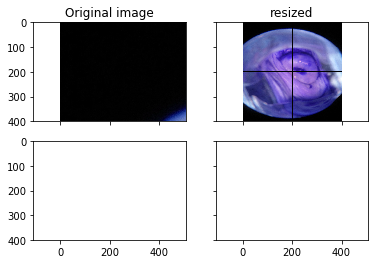

In [27]:
#we can crop to produce a smaller resolution. 
import skimage
from skimage.transform import rescale, resize, downscale_local_mean

image = cv2.imread('/Users/dc/DeepLearning/kaggle/train/Type_1/0.jpg')
height = image.shape[0]
width = image.shape[1]
cv2.line(image,(0,int(height/2.)),(int(width),int(height/2.0)),(255,0,0))
cv2.line(image,(int(width/2.),0),(int(width/2.0),height),(255,0,0))


print ('orig:',image.shape)
image_resized = resize(image, (400, 400), mode='reflect')
height = image_resized.shape[0]
width = image_resized.shape[1]
cv2.line(image_resized,(0,int(height/2.)),(int(width),int(height/2.0)),(255,0,0))
cv2.line(image_resized,(int(width/2.),0),(int(width/2.0),height),(255,0,0))

#image_downscaled = downscale_local_mean(image, (480, 640))
print ('resized:',image_resized.shape)
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True)

ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title("Original image")

ax[1].imshow(image_resized)
ax[1].set_title("resized")

#ax[2].imshow(image_downscaled)
#ax[2].set_title("downscaled")


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator


print (K.image_data_format())

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( 150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

channels_last


In [3]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [4]:
import os,random


def move_file(source_path,dest_path):
    """
    input: source path, dest path
    output: move 20 percent files from source path to dest path
    """
    list_files = os.listdir(source_path)
    print (len(list_files))

    num_moved=0
    for x in range(1,int(.20*len(list_files))):
        index = random.randint(1, len(list_files))
        print(index,list_files[index])
        source_file = source_path+list_files[index]
        if(os.path.isfile(source_file)):
            dest_file = dest_path+list_files[index]
            os.rename(source_file,dest_file)
            num_moved+=1

    print (num_moved)

#move_file(os.getcwd()+"/data/train/type1/",os.getcwd()+"/data/valid/type1/")
#move_file(os.getcwd()+"/data/train/type2/",os.getcwd()+"/data/valid/type2/")
move_file(os.getcwd()+"/data/train/type3/",os.getcwd()+"/data/valid/type3/")


1906
1003 4848.jpg
1116 5089.jpg
1422 5715.jpg
803 4293.jpg
1054 4973.jpg
191 151.jpg
410 2586.jpg
1227 533.jpg
863 4462.jpg
1440 5765.jpg
708 3949.jpg
1626 6264.jpg
1010 4855.jpg
83 1190.jpg
61 113.jpg
1230 5337.jpg
922 4660.jpg
136 1350.jpg
1227 533.jpg
278 1901.jpg
286 1960.jpg
1456 5827.jpg
825 4344.jpg
519 3120.jpg
831 4365.jpg
1562 6074.jpg
474 2904.jpg
1868 902.jpg
176 1453.jpg
304 2036.jpg
1302 5486.jpg
990 4825.jpg
927 4708.jpg
550 325.jpg
318 2111.jpg
386 2439.jpg
455 2794.jpg
1615 6238.jpg
1689 6618.jpg
1589 6159.jpg
366 2313.jpg
1815 784.jpg
68 1147.jpg
159 1403.jpg
217 163.jpg
120 1291.jpg
901 4580.jpg
1252 5413.jpg
1057 4978.jpg
279 1907.jpg
576 3361.jpg
1804 767.jpg
1740 6790.jpg
1205 5303.jpg
1805 769.jpg
950 4767.jpg
661 3737.jpg
848 4424.jpg
1195 5293.jpg
1120 5102.jpg
1605 6208.jpg
1818 792.jpg
239 1718.jpg
1563 6090.jpg
1624 6262.jpg
405 256.jpg
1896 977.jpg
278 1901.jpg
698 3909.jpg
1588 6158.jpg
968 4790.jpg
9 1014.jpg
264 1812.jpg
1117 5092.jpg
1513 5958.jpg
1902

In [4]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/valid',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 5897 images belonging to 3 classes.
Found 1730 images belonging to 3 classes.


In [5]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [6]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')

Epoch 1/50
 14/125 [==>...........................] - ETA: 828s - loss: 0.6015 - acc: 0.5179

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/dc/anaconda/envs/py35/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Users/dc/anaconda/envs/py35/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dc/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/training.py", line 612, in data_generator_task
    generator_output = next(self._generator)
  File "/Users/dc/anaconda/envs/py35/lib/python3.5/site-packages/keras/preprocessing/image.py", line 727, in __next__
    return self.next(*args, **kwargs)
  File "/Users/dc/anaconda/envs/py35/lib/python3.5/site-packages/keras/preprocessing/image.py", line 960, in next
    target_size=self.target_size)
  File "/Users/dc/anaconda/envs/py35/lib/python3.5/site-packages/keras/preprocessing/image.py", line 330, in load_img
    img = img.resize(hw_tuple)
  File "/Users/dc/anaconda/envs/py35/lib/python3.5/site-packages/PIL/Ima

ValueError: output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: None